In [15]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy import hstack


In [16]:
def plot_scaler(data, col, categories=None):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[col])

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    print(f'Cumulative variance ratio for 2 components: {cumulative_variance_ratio[1]*100:.2f}%')
    print(f'component 3: {explained_variance_ratio[2]*100:.2f}%')

    fig, ax = plt.subplots(3, 3, figsize=(16, 12))
    ax[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    ax[0, 0].set_xlabel('Principal Component')
    ax[0, 0].set_ylabel('Explained Variance Ratio')
    ax[0, 0].set_title('Explained Variance Ratio by Principal Component')
    
    ax[0, 1].plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio)
    ax[0, 1].set_xlabel('Number of components')
    ax[0, 1].set_ylabel('Cumulative explained variance')
    ax[0, 1].set_title('Scree Plot')


    feature_names = data[col].columns
    if len(feature_names) > 2:
        for i in range(len(feature_names)):
            ax[1, 0].arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                           head_width=0.05, head_length=0.05, color='blue')
    
        for i, feature in enumerate(feature_names):
            ax[1, 0].text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature,
                          color='black', ha='center', va='center')
    
        ax[1, 0].set_xlim(-1, 1)
        ax[1, 0].set_ylim(-1, 1)
        ax[1, 0].set_xlabel('Principal Component 1')
        ax[1, 0].set_ylabel('Principal Component 2')
        ax[1, 0].set_title('Correlation Circle')
        ax[1, 0].grid()
        
        for i in range(len(feature_names)):
            ax[1, 1].arrow(0, 0, pca.components_[0, i], pca.components_[2, i], 
                           head_width=0.05, head_length=0.05, color='blue')
        for i, feature in enumerate(feature_names):
            ax[1, 1].text(pca.components_[0, i] * 1.15, pca.components_[2, i] * 1.15, feature,
                          color='black', ha='center', va='center')
        ax[1, 1].set_xlim(-1, 1)
        ax[1, 1].set_ylim(-1, 1)
        ax[1, 1].set_xlabel('Principal Component 1')
        ax[1, 1].set_ylabel('Principal Component 2')
        ax[1, 1].set_title('Correlation Circle')
        ax[1, 1].grid()
        
        for i in range(len(feature_names)):
            ax[1, 2].arrow(0, 0, pca.components_[0, i], pca.components_[3, i], 
                           head_width=0.05, head_length=0.05, color='blue')
        for i, feature in enumerate(feature_names):
            ax[1, 2].text(pca.components_[0, i] * 1.15, pca.components_[3, i] * 1.15, feature,
                          color='black', ha='center', va='center')
        ax[1, 2].set_xlim(-1, 1)
        ax[1, 2].set_ylim(-1, 1)
        ax[1, 2].set_xlabel('Principal Component 1')
        ax[1, 2].set_ylabel('Principal Component 2')
        ax[1, 2].set_title('Correlation Circle')
        ax[1, 2].grid()

        scatter = ax[2, 0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
        ax[2, 0].set_xlabel('First principal component')
        ax[2, 0].set_ylabel('Second principal component')
        ax[2, 0].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[1, 1])
        scatter = ax[2, 1].scatter(X_pca[:, 0], X_pca[:, 2], alpha=0.5)
        ax[2, 1].set_xlabel('First principal component')
        ax[2, 1].set_ylabel('Third principal component')
        ax[2, 1].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[2, 0])
        scatter = ax[2, 2].scatter(X_pca[:, 0], X_pca[:, 3], alpha=0.5)
        ax[2, 2].set_xlabel('First principal component')
        ax[2, 2].set_ylabel('Forth principal component')
        ax[2, 2].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[2, 1])
    plt.tight_layout()
    plt.show()
    return X_scaled , X_pca

In [17]:

con = sqlite3.connect('olist.db')
cursor  = con.cursor()
cursor.execute('SELECT sql FROM sqlite_master WHERE type="table"')
res = cursor.fetchall()
df = pd.DataFrame(res, columns=['SQL'])
print(df.to_string(index=False))
con.close()

                                                                                                                                                                                                                                                                                                                   SQL
                                                                                                                                CREATE TABLE customers (\n\t"index" BIGINT, \n\tcustomer_id TEXT, \n\tcustomer_unique_id TEXT, \n\tcustomer_zip_code_prefix BIGINT, \n\tcustomer_city TEXT, \n\tcustomer_state TEXT\n)
                                                                                                                       CREATE TABLE geoloc (\n\t"index" BIGINT, \n\tgeolocation_zip_code_prefix BIGINT, \n\tgeolocation_lat FLOAT, \n\tgeolocation_lng FLOAT, \n\tgeolocation_city TEXT, \n\tgeolocation_state TEXT\n)
                                                                   

See if there is missing Data

In [18]:
con = sqlite3.connect('olist.db')
cursor  = con.cursor()
query = '''
    SELECT
        COUNT(*) AS total_rows,
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS missing_customer_id,
        SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS missing_order_id
    FROM
        orders;
    '''
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)
con.close()


(99441, 0, 0)


In [19]:

con = sqlite3.connect('olist.db')
cursor  = con.cursor()
query = '''
    SELECT
        order_id,
        COUNT(*) AS count
    FROM
        orders
    GROUP BY 
        order_id
    HAVING
        COUNT(*) > 1;
    '''
cursor.execute(query)
results = cursor.fetchall()
print(results)
con.close()

[]


In [20]:
con = sqlite3.connect('olist.db')
cursor  = con.cursor()
query = {
    'customers': 'SELECT * FROM customers',
    'orders': 'SELECT * FROM orders',
    'order_items': 'SELECT * FROM order_items',
    'order_pymts': 'SELECT * FROM order_pymts',
    'order_reviews': 'SELECT * FROM order_reviews',
    'products': 'SELECT * FROM products',
    'sellers': 'SELECT * FROM sellers',
    'geoloc': 'SELECT * FROM geoloc',
    'translation': 'SELECT * FROM translation'
}

dataframes = {}
for table_name, query in query.items():
    dataframes[table_name] = pd.read_sql_query(query, con)

for table_name, df in dataframes.items():
    if table_name == 'order_pymts':
        print(df['payment_type'].value_counts())
        print('\n')
    print(f"Table: {table_name}")
    print(df.isnull().sum())
con.close()


Table: customers
index                       0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Table: orders
index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Table: order_items
index                  0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Table: order_pymts
index                   

In [23]:
query = '''
WITH 
    review_scores AS (
    SELECT
        c.customer_unique_id,
        AVG(r.review_score) AS average_review_score
    FROM
        orders o
        JOIN order_reviews r ON o.order_id = r.order_id 
        JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY
        c.customer_unique_id
    ),
    seller_count AS (
    SELECT
        c.customer_unique_id,
        COUNT(DISTINCT i.seller_id) AS nb_of_different_sellers
    FROM
        orders o
        JOIN order_items i ON o.order_id = i.order_id
        JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY
        c.customer_unique_id
    ),
    rfm AS (
    SELECT
        c.customer_unique_id,
        MAX(o.order_purchase_timestamp) AS last_order_date,
        COUNT(o.order_id) AS frequency,
        SUM(i.price) AS monetary
    FROM
        orders o
        JOIN order_items i ON o.order_id = i.order_id
        JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY
        c.customer_unique_id
    ),
    recency_calc AS (
    SELECT
        customer_unique_id,
        JULIANDAY('now') - JULIANDAY(last_order_date) AS recency
    FROM
        rfm
    ),
    payment_methods AS (
    SELECT
        c.customer_unique_id,
        SUM(CASE WHEN p.payment_type = 'credit_card' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS credit_card_rate,
        SUM(CASE WHEN p.payment_type = 'boleto' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS boleto_rate,
        SUM(CASE WHEN p.payment_type = 'voucher' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS voucher_rate,
        SUM(CASE WHEN p.payment_type = 'debit_card' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS debit_card_rate
    FROM
        orders o
        JOIN order_pymts p ON o.order_id = p.order_id
        JOIN customers c ON o.customer_id = c.customer_id
    WHERE
        p.payment_type != 'not_defined'
    GROUP BY
        c.customer_unique_id
    )
SELECT
    c.customer_unique_id,
    COALESCE(rs.average_review_score, 0) AS average_review_score,
    COALESCE(sc.nb_of_different_sellers, 0) AS nb_of_different_sellers,
    COALESCE(rc.recency, 0) AS recency,
    COALESCE(rfm.frequency, 0) AS frequency,
    COALESCE(rfm.monetary, 0) AS monetary,
    COALESCE(pm.credit_card_rate, 0) AS credit_card_rate,
    COALESCE(pm.boleto_rate, 0) AS boleto_rate,
    COALESCE(pm.voucher_rate, 0) AS voucher_rate,
    COALESCE(pm.debit_card_rate, 0) AS debit_card_rate
FROM
    customers c
    LEFT JOIN review_scores rs ON c.customer_unique_id = rs.customer_unique_id
    LEFT JOIN seller_count sc ON c.customer_unique_id = sc.customer_unique_id
    LEFT JOIN recency_calc rc ON c.customer_unique_id = rc.customer_unique_id
    LEFT JOIN rfm ON c.customer_unique_id = rfm.customer_unique_id
    LEFT JOIN payment_methods pm ON c.customer_unique_id = pm.customer_unique_id;
'''

In [24]:
conn = sqlite3.connect('olist.db')
df = pd.read_sql_query(query, conn)
conn.close()


In [29]:
df_grouped = df.groupby('customer_unique_id').agg({
    'average_review_score': 'mean',
    'nb_of_different_sellers': 'sum',
    'recency': 'mean',
    'frequency': 'sum',
    'monetary': 'sum',
    'credit_card_rate': 'mean',
    'boleto_rate': 'mean',
    'voucher_rate': 'mean',
    'debit_card_rate': 'mean'
})
df_grouped.head()

,average_review_score,nb_of_different_sellers,recency,frequency,monetary,credit_card_rate,boleto_rate,voucher_rate,debit_card_rate
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.0,1,2314.192368,1,129.90,1.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1,2317.181941,1,18.90,1.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,3.0,1,2739.769723,1,69.00,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,4.0,1,2523.794287,1,25.99,1.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,5.0,1,2490.824838,1,180.00,1.0,0.0,0.0,0.0


In [30]:
df_grouped.describe()
print(df_grouped)

                                  average_review_score  \
customer_unique_id                                       
0000366f3b9a7992bf8c76cfdf3221e2                   5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                   4.0   
0000f46a3911fa3c0805444483337064                   3.0   
0000f6ccb0745a6a4b88665a16c9f078                   4.0   
0004aac84e0df4da2b147fca70cf8255                   5.0   
...                                                ...   
fffcf5a5ff07b0908bd4e2dbc735a684                   5.0   
fffea47cd6d3cc0a88bd621562a9d061                   4.0   
ffff371b4d645b6ecea244b27531430a                   5.0   
ffff5962728ec6157033ef9805bacc48                   5.0   
ffffd2657e2aad2907e67c3e9daecbeb                   5.0   

                                  nb_of_different_sellers      recency  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                        1  2314.192368   
0000b849f77a49e4a4ce2b2

Cumulative variance ratio for 2 components: 50.88%
component 3: 13.37%


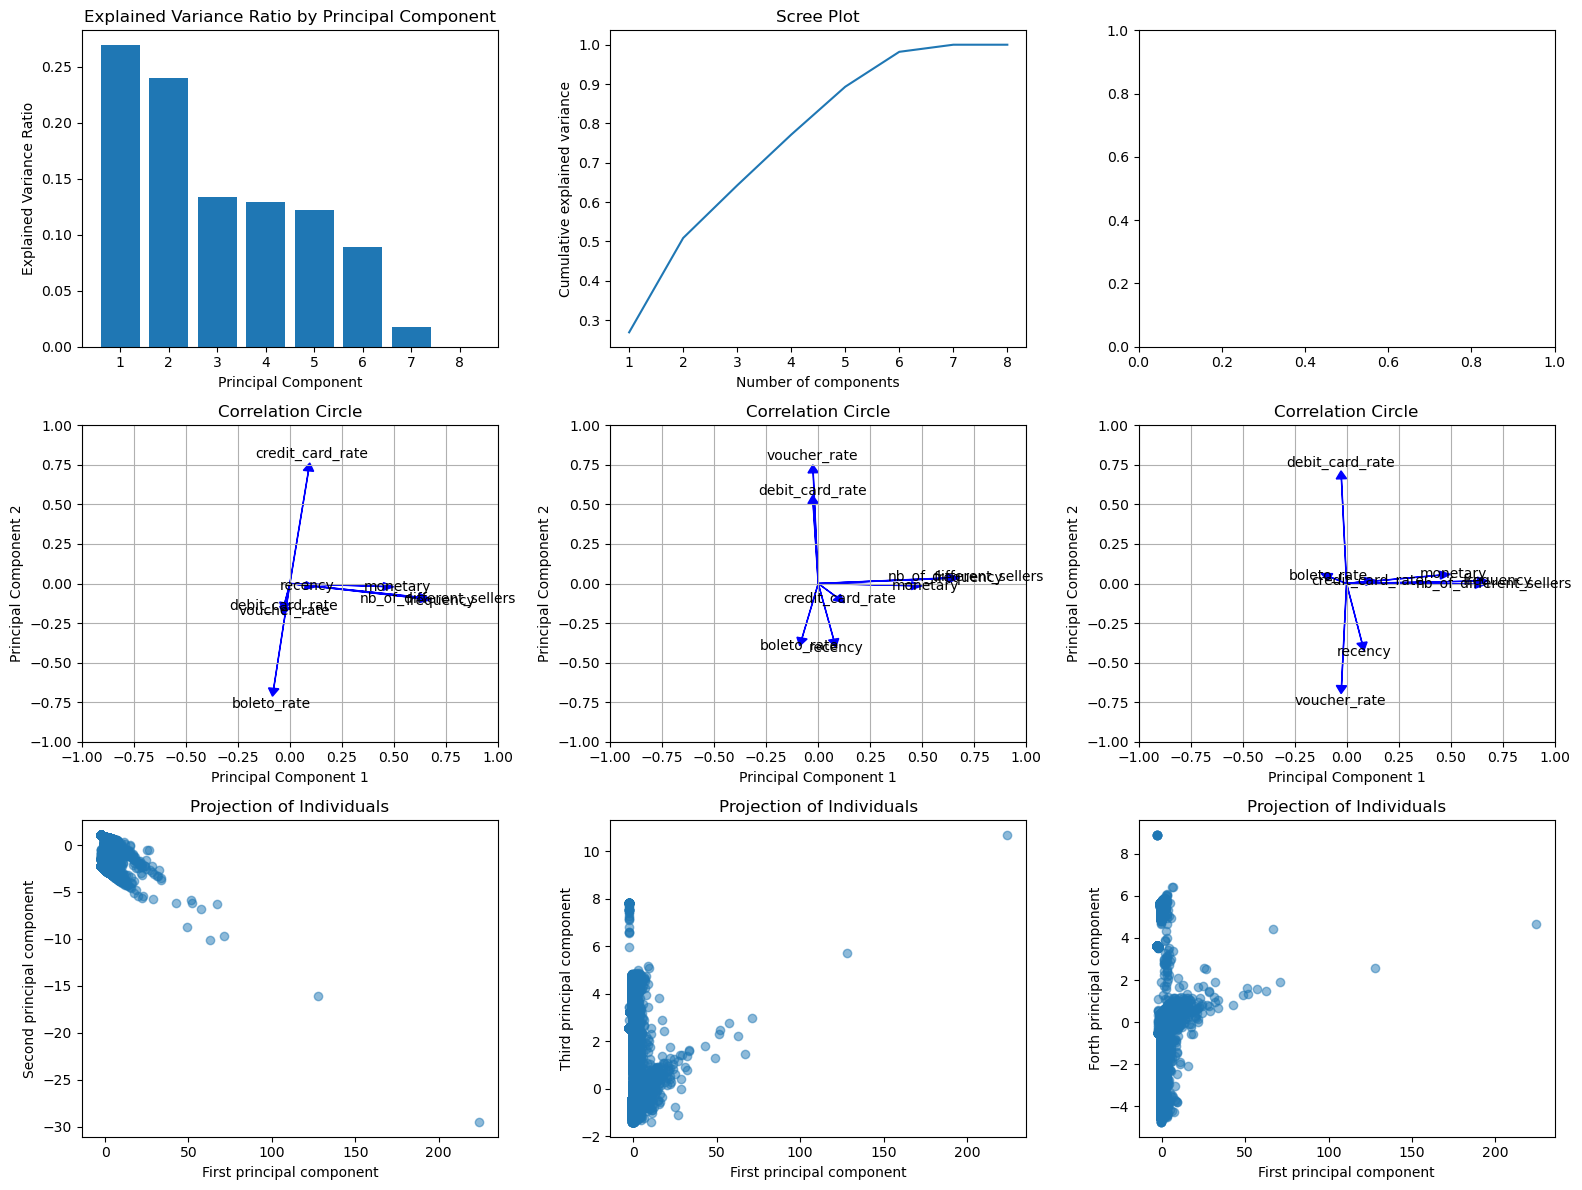

In [35]:
X = df_grouped.iloc[:,1:]
features = X.columns
X_scaled ,X_compressed = plot_scaler(X, features, categories=None)

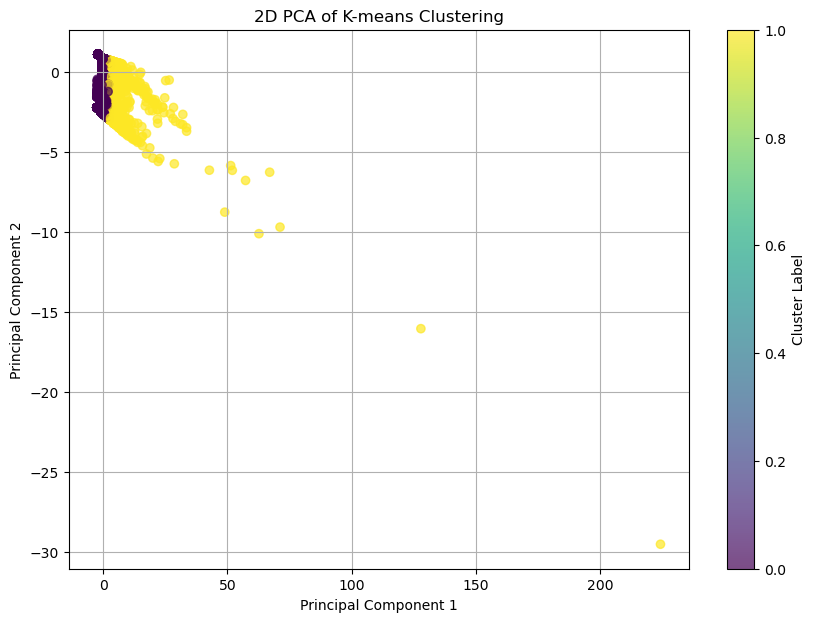

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_compressed)
pca = PCA(n_components=2)
data_pca = X_compressed

# Plot the data points with cluster labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of K-means Clustering')
plt.grid(True)
plt.show()